In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
# creating a model with sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [ ]:
# compile the model using loss function and optimizer
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(), metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=27, validation_data = (X_valid, y_valid))

Epoch 1/27
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4120 - accuracy: 0.8537 - val_loss: 0.3932 - val_accuracy: 0.8612
Epoch 2/27
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3931 - accuracy: 0.8606 - val_loss: 0.3755 - val_accuracy: 0.8714
Epoch 3/27
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3772 - accuracy: 0.8657 - val_loss: 0.3684 - val_accuracy: 0.8712
Epoch 4/27
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3626 - accuracy: 0.8700 - val_loss: 0.3564 - val_accuracy: 0.8762
Epoch 5/27
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3513 - accuracy: 0.8759 - val_loss: 0.3459 - val_accuracy: 0.8776
Epoch 6/27
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3405 - accuracy: 0.8782 - val_loss: 0.3470 - val_accuracy: 0.8770
Epoch 7/27
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3313 - accuracy: 0.8814 - val_loss: 0.3478 - val_accur

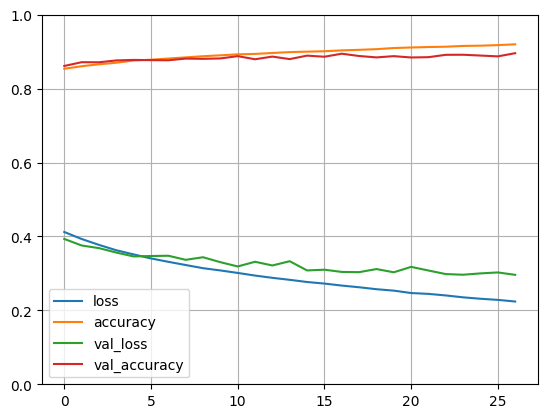

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 71.2423 - accuracy: 0.8353


[71.24230194091797, 0.8353000283241272]

In [ ]:
import numpy as np

In [ ]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 1s 592ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

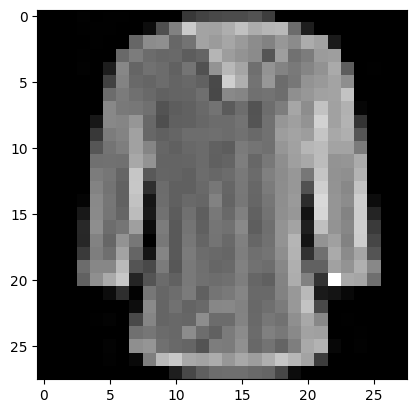

In [ ]:
plt.imshow(X_test[4], cmap="gray")
plt.show()